In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

**1.)** (20 points) Import this data

In [2]:
raw = pd.read_csv('bac.csv',encoding='cp1252')
data = raw.rename(columns={'•ÈÀDate': 'Date'})
data['Date'] = pd.to_datetime(data['Date'])

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,log of close
0,2014-09-23,17.05,17.20,17.03,17.05,91363298,2.836150
1,2014-09-22,17.09,17.17,16.99,17.03,109276696,2.834976
2,2014-09-19,17.15,17.17,16.88,16.95,88455049,2.830268
3,2014-09-18,16.88,17.15,16.87,17.04,111923229,2.835564
4,2014-09-17,16.71,16.93,16.68,16.77,82902719,2.819592


**2.)** We denote by S(t) the stock price at the close and by
X(t) = logS(t) its log price. The last column in the spreadsheet shows
the daily values of X(t) at the close. Here the time unit is ∆t = 1 day.
The log return is defined as:

$r(t) = X(t + 1) − X(t)$

Compute the log returns for the entire data set and plot them.

In [4]:
p = data['log of close'][0:]
q = data['log of close'][1:]
tmp = p.values[:250]-q.values
tmp = np.append(tmp, 0)
data['log_return'] = tmp

In [5]:
data.head()

,Date,Open,High,Low,Close,Volume,log of close,log_return
0,2014-09-23,17.05,17.20,17.03,17.05,91363298,2.836150,0.001174
1,2014-09-22,17.09,17.17,16.99,17.03,109276696,2.834976,0.004709
2,2014-09-19,17.15,17.17,16.88,16.95,88455049,2.830268,-0.005296
3,2014-09-18,16.88,17.15,16.87,17.04,111923229,2.835564,0.015972
4,2014-09-17,16.71,16.93,16.68,16.77,82902719,2.819592,0.003584


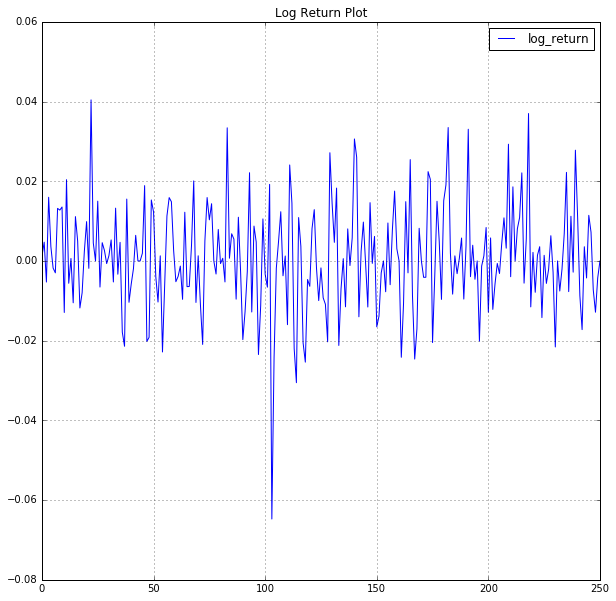

In [6]:
data.plot(y='log_return', title='Log Return Plot', grid=True,figsize=(10, 10))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae99038358>]], dtype=object)

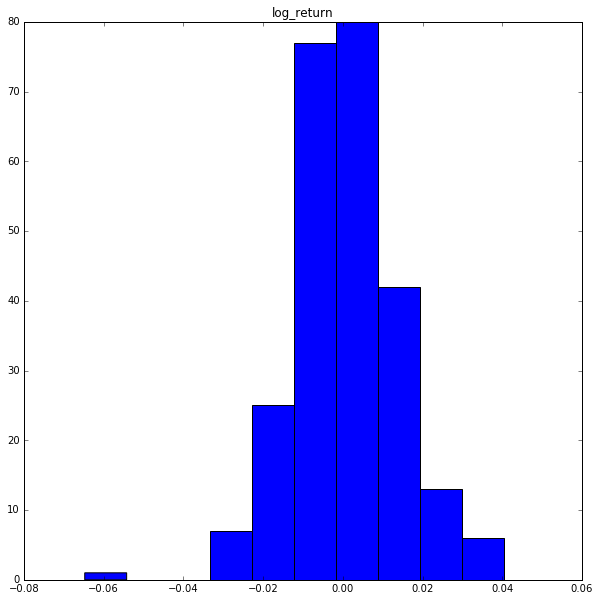

In [7]:
data.hist(column='log_return', grid=False, figsize=(10, 10))

**3.)** We denote by τ the time lag. It is a multiple of ∆t. Compute
the autocorrelation function:

In [8]:
auto_corr_res1 = [data['log_return'].autocorr(lag=i) for i in range(30)]
lag_indices = [j for j in range(30)]

Auto-correlation vs Lag


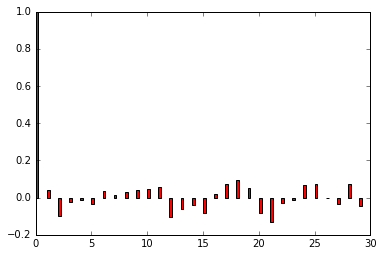

In [9]:
ax = plt.bar(lag_indices, auto_corr_res1, width = 1/4, color='red')

print('Auto-correlation vs Lag')

**4.)**(20 points) Discuss the results obtained in the previous question. In particular, are the autocorrelations significant or not? Justify your answer by using a statistical test.

The previous problem provides a view of log return r(t). As we can see in cell #10 above, the distribution of log return r(t) is heavily left-skewed! Also, looking at the same cell, we can tell that the autocorrelations of distinct intervals is not significant as they are all less than 0.1 and we can ignore this. An important observation to note is the switching sign with varying $\tau$. The auto-correlation for independent intervals do not have a significant increment or decrement trend. In order to investigate the significance of auto-correlation function, I introduced a test that allows us to investigate auto-correlation:

In [10]:
t_vals = []
for i in range(1, 30):
    r = auto_corr_res1[i]
    t_vals.append(r*np.sqrt((250-i-2)/(1-r**2)))
print(t_vals)

[0.62002143054190872, -1.5607660562351868, -0.34114626336199183, -0.2196156570459353, -0.57325939184344055, 0.580575222963849, 0.23636282122496685, 0.44978411438313959, 0.61273190163405966, 0.71723705264883253, 0.84602349500284701, -1.647513014060261, -0.96747539391931181, -0.60407979566656744, -1.2608303487331425, 0.3284508082693483, 1.0992141292435416, 1.4478453700695977, 0.77729809361631341, -1.234540989642374, -1.998884854377889, -0.45385274773381734, -0.20856309269898138, 0.98774405726183823, 1.0752286811685521, 0.0028073530904054469, -0.47688367656061531, 1.0742387707538772, -0.69721955708439487]


Using the statistical method shown above, I determine that correlation cofefficients for all intervals is < 2. As shown on the t-distribution table above, the entries with degrees of freedom larger than 200, we can claim that each autocorrelation is insignificant at 5% significance level.

**5.)**Study now the nonlinear autocorrelation functions:
corr(|r(s + τ )|, |r(s)|)
where | · | denotes the absolute value, and
$corr(r(s + τ )^{2}, r(s)^2$

Using a similar method to problem #3, but this time using the absolute value that prohibits the change in sign that I discussed in the earlier step:

In [11]:
auto_corr_res2 = [np.abs(data['log_return']).autocorr(lag=i) for i in range(30)]
lag_indices = [j for j in range(30)]

Bar plot for auto-correlation defined in question 5


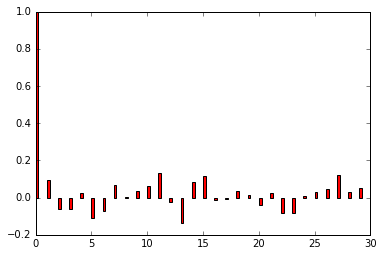

In [12]:
ax = plt.bar(lag_indices, auto_corr_res2, width = 1/4, color='red')
print('Bar plot for auto-correlation defined in question 5')

For the most intervals, the correlations with absolute value are not significant, as the value is fairly low. However, where $\tau$ is 11 and 13, autocorrelations become significant as they're almost 0.2.Again, the sign of the correlation varies despite the absolute value 

In [13]:
# Applying the same statistical test
t_vals = []
for i in range(1, 30):
    r = auto_corr_res2[i]
    t_vals.append(r*np.sqrt((250-i-2)/(1-r**2)))
print(t_vals)

[1.4555799988910871, -0.96181886986773302, -0.95483474079168362, 0.42193840907144753, -1.7187899637534114, -1.0922182086427366, 1.0309353531343404, 0.051995696136744991, 0.58380889033612471, 0.93558083145945636, 2.0414242868035313, -0.32830380417118388, -2.107298271954035, 1.2468177556397395, 1.824827245475755, -0.1923057193329698, -0.075107393402397693, 0.52541016404047247, 0.19291626914162688, -0.6337548928530391, 0.3360114733488011, -1.2698612718407234, -1.2237269714646259, 0.093774430687026122, 0.41569451779370259, 0.65140461719254916, 1.8270494085188358, 0.48118696889478524, 0.78828362732262214]


Again, we can see that each absolute value of t statistics is smaller than 2, except when lag period τ=11 and τ=13. And according to t-distribution table with degrees of freedom larger than 200, we can claim that autocorrelations are insignificant at 5% significance level except when lag period τ = 11 and 13. Even 5.05% is not that significant, however worth taking into consideration.

In [14]:
auto_corr_res3 = [np.square(data['log_return']).autocorr(lag=i) for i in range(30)]
lag_indices = [j for j in range(30)]

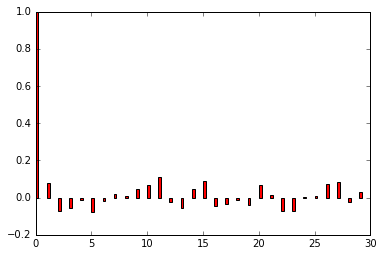

In [15]:
ax = plt.bar(lag_indices, auto_corr_res3, width = 1/4, color='red')


A similar pattern occurs for auto-correlation function that is similar to the 3rd problem.All the correlation values calculated are insignificantly small. Again, varying $\tau$ varies the sign of the intervals and there seems to be no pattern between the intervals.The so-called t-distribution test supports these findings.

In [16]:
t_vals = []
for i in range(1, 30):
#     r = data['log_return'].autocorr(lag=i+i)
    r = auto_corr_res3[i]
    t_vals.append(r*np.sqrt((250-i-2)/(1-r**2)))
print(t_vals)

[1.2519975389382534, -1.0958317076977337, -0.87408046793386296, -0.23970666520034734, -1.2202436264190559, -0.27303389158572766, 0.28863885800146644, 0.11757930997164583, 0.72724307732167537, 1.0463766977005249, 1.6774042175497239, -0.32577855039355957, -0.85081798690843291, 0.6905110977493194, 1.3861721812892893, -0.70101838864523214, -0.49934980682404123, -0.19720121580831765, -0.6060785433450836, 0.98730942936045474, 0.21083619950909782, -1.124540990645303, -1.0586562969421329, 0.077414769503912587, 0.093497965993169938, 1.1128064679459242, 1.2813312996679729, -0.31331331725265649, 0.45438358574790239]
